In [ ]:
#Data Augmentation

In [4]:
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1, 
    horizontal_flip = False,
    vertical_flip = False
)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

Metal device set to: Apple M1 Pro


2023-05-15 10:44:52.494390: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-15 10:44:52.494923: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(datagen.flow(x_train, y_train), epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


2023-05-15 10:46:34.302443: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-15 10:46:34.486560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.8353

2023-05-15 10:46:47.491240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 15s 7ms/step - loss: 0.5411 - accuracy: 0.8354 - val_loss: 0.1207 - val_accuracy: 0.9712
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2809 - accuracy: 0.9154 - val_loss: 0.0939 - val_accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2410 - accuracy: 0.9266 - val_loss: 0.0817 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2110 - accuracy: 0.9374 - val_loss: 0.1073 - val_accuracy: 0.9677
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1931 - accuracy: 0.9417 - val_loss: 0.0957 - val_accuracy: 0.9717


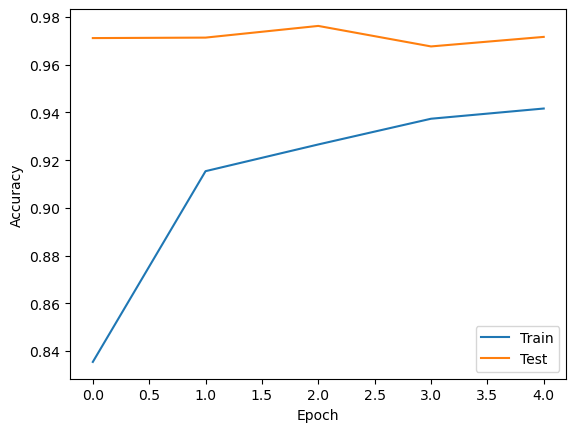

In [9]:
import matplotlib.pyplot as plt

#Plotting
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

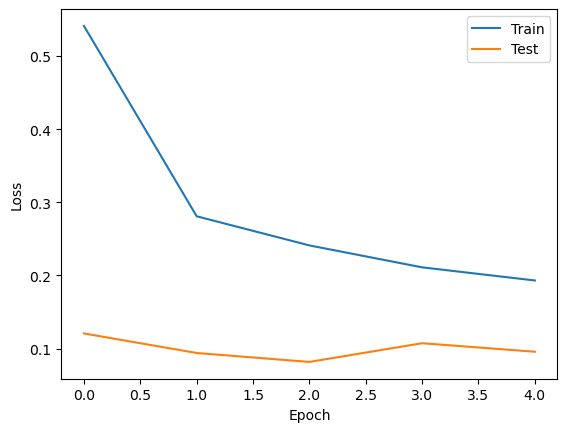

In [10]:
plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
print("Accuracy:", hist.history['accuracy'][-1])

Accuracy: 0.9416666626930237
